In [1]:
#Import the required libraries
import os
import numpy as np 
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
import shutil
import random
import matplotlib.image as mpimg
import PIL
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# read the csv file
df = pd.read_csv('Tomato_metadata.csv')

In [3]:
# Check the number of images in df
len(df)

13737

In [4]:
df.head()

,path,datapoint_id,dagshub_download_url,Valid,disease,height,media type,size,width
0,Bacterial spot/Bs100.JPG,81502719,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,9550,227
1,Bacterial spot/Bs101.JPG,81502720,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,8386,227
2,Bacterial spot/Bs102.JPG,81502721,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,10309,227
3,Bacterial spot/Bs103.JPG,81502722,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,10036,227
4,Bacterial spot/Bs104.JPG,81502723,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,9845,227


In [5]:
# Rename so columns
df = df.rename(columns={'path': 'name','disease': 'label'})

In [6]:
# I want .jpg type of images 
df['name'] = df['name'].str.replace('.JPG', '.jpg', regex=False) \
                               .str.replace('.JPEG', '.jpg', regex=False) \
                               .str.replace('jpeg', 'jpg', regex=True)

In [7]:
# Verify the images
df.head()

,name,datapoint_id,dagshub_download_url,Valid,label,height,media type,size,width
0,Bacterial spot/Bs100.jpg,81502719,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,9550,227
1,Bacterial spot/Bs101.jpg,81502720,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,8386,227
2,Bacterial spot/Bs102.jpg,81502721,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,10309,227
3,Bacterial spot/Bs103.jpg,81502722,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,10036,227
4,Bacterial spot/Bs104.jpg,81502723,https://dagshub.com/api/v1/repos/Omdena/KenyaC...,True,Bacterial Spot,227,image/jpeg,9845,227


In [8]:
# Categories of diseases in the dataset
list(df.label.unique())

['Bacterial Spot',
 'Black Mold',
 'Gray spot',
 'Late Blight',
 'Early Blight',
 'Leaf Mold',
 'Septoria leaf spot',
 'Target Spot',
 'Yellow_Leaf_Virus',
 'Mosaic Virus',
 'Healthy']

In [9]:
# Checck the values counts
df.label.value_counts()

Yellow_Leaf_Virus     5056
Late Blight           1932
Septoria leaf spot    1771
Healthy               1671
Target Spot           1404
Leaf Mold              922
Early Blight           428
Mosaic Virus           372
Bacterial Spot          88
Black Mold              53
Gray spot               40
Name: label, dtype: int64

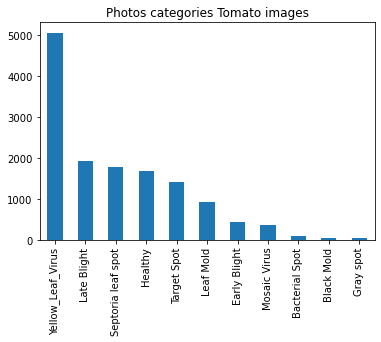

In [10]:
# Plot bar chart to check the distribution
df.label.value_counts().plot(kind='bar')
plt.title('Photos categories Tomato images')
plt.show()

In [11]:
# Strip the last part of the name for example Bacterial spot/Bs100.jpg I want to replace by Bs100.jpg 
df['name'] = df['name'].apply(lambda x: x.split('/')[-1])

# Create a new dataset X with only "name" and "label" columns
X=df[['name', 'label']]
# Check the same data
X.sample(10)

,name,label
10465,c4c6fad3-9805-45ff-bf51-3ca5f7d4a079___UF.GRC_...,Yellow_Leaf_Virus
4886,d0c0535c-8273-4a9a-9fea-8ab8402e3f92___Keller....,Septoria leaf spot
5713,5eee971d-a69d-4f1d-9e6f-5d3f59ed2e3d___Com.G_T...,Target Spot
9281,809d2867-5d16-452e-8759-07c763bd2120___YLCV_GC...,Yellow_Leaf_Virus
7814,373bf7cd-8cf2-46dd-accb-71bd92a75e25___YLCV_GC...,Yellow_Leaf_Virus
10775,d366aebe-5271-46fa-90e6-9e04d6566b87___YLCV_NR...,Yellow_Leaf_Virus
7794,3676b045-d562-4423-8033-8b6880b0e065___YLCV_NR...,Yellow_Leaf_Virus
7196,1a799611-3397-4cce-843f-f62058b5a1e4___YLCV_GC...,Yellow_Leaf_Virus
6581,f5b4a026-a578-4dac-a3ba-fc960a573590___Com.G_T...,Target Spot
8413,5857bdc2-f4f7-4fc2-a9ef-006b34900f82___YLCV_NR...,Yellow_Leaf_Virus


In [12]:
# Check for duplicated data
X.duplicated().sum()

0

In [13]:
X.shape

(13737, 2)

In [14]:
from pathlib import Path

# Define the folder containing the images
folder = 'Tomato_dataset'
img_folder = Path(folder)  # Convert to Path object

# Iterate over all files with .JPG extension
for img_path in img_folder.glob('**/*.JPG'):  # Search recursively in subdirectories
    new_path = img_path.with_suffix('.jpg')  # Change the extension to .jpg
    img_path.rename(new_path)  # Rename the file

print("All .JPG files have been renamed to .jpg.")

All .JPG files have been renamed to .jpg.


In [15]:
# Count the number of .jpg files in all subdirectories
number_images = len(list(img_folder.glob('**/*.jpg')))
print('Number of images:', number_images)

Number of images: 13736


In [16]:
# Get a set of all actual image filenames in the folder
existing_images = {img.name for img in img_folder.glob('*')}

# Filter the DataFrame by keep rows where 'photo_id' exists in the folder
X = X[~df['name'].isin(existing_images) == False]

# Reset the index
X.reset_index(drop=True, inplace=True)

# Verify the result
X.head()

,name,label
0,Bs100.jpg,Bacterial Spot
1,Bs101.jpg,Bacterial Spot
2,Bs102.jpg,Bacterial Spot
3,Bs103.jpg,Bacterial Spot
4,Bs104.jpg,Bacterial Spot


In [17]:
X.shape

(13736, 2)

In [18]:
# Get all image file names from the dataset folder (assuming .jpg extension)
dataset_images = {img.name for img in img_folder.rglob('*.jpg')}  # Set of image filenames in the dataset

# Get all image file names from the DataFrame
X_images = set(X['name'])  # Assuming the column with image names is 'photo_id'

# Check for matches
matching_images = X_images.intersection(dataset_images)
missing_in_dataset = X_images - dataset_images
extra_in_dataset = dataset_images - X_images

# Print results
print(f"Number of matching images: {len(matching_images)}")
print(f"Number of images in DataFrame but missing in image folder: {len(missing_in_dataset)}")
print(f"Number of extra images in dataset but not in DataFrame: {len(extra_in_dataset)}")

if missing_in_dataset:
    print("Images in DataFrame but missing in image folder:")
    print(missing_in_dataset)

if extra_in_dataset:
    print("Images in dataset but not in DataFrame:")
    print(extra_in_dataset)

Number of matching images: 13736
Number of images in DataFrame but missing in image folder: 0
Number of extra images in dataset but not in DataFrame: 0


In [19]:
from sklearn.model_selection import train_test_split

# Create first validation set with the whole dataset
train, df_valid = train_test_split(X, test_size=2000,
                                   random_state=42,
                                   stratify=X['label'])

In [20]:
# Create test and training set with the remaining dataset
df_train, df_test = train_test_split(train,
                                     test_size=2000,
                                     random_state=42,
                                     stratify=train['label'])

In [21]:
len(df_train), len(df_test), len(df_valid)

(9736, 2000, 2000)

In [22]:
df_train['label'].value_counts()

Yellow_Leaf_Virus     3584
Late Blight           1369
Septoria leaf spot    1255
Healthy               1185
Target Spot            995
Leaf Mold              654
Early Blight           303
Mosaic Virus           264
Bacterial Spot          62
Black Mold              37
Gray spot               28
Name: label, dtype: int64

In [23]:
# Define the parent folder where you want to create subdirectories
parent_folder = Path('Tomato_dataset')  # Replace with the actual path

# Define the names of the directories to create
sub_dirs = ['train_dir', 'valid_dir', 'test_dir']

# Loop through the subdirectory names and create them inside the parent folder
for sub_dir in sub_dirs:
    (parent_folder / sub_dir).mkdir(parents=True, exist_ok=True)

print("Directories created successfully!")

Directories created successfully!


In [24]:
# Define the names of the directories to create
sub_dirs = ['train_dir', 'valid_dir', 'test_dir']

# Class names
class_names = ['Bacterial Spot', 'Black Mold', 'Gray spot', 'Late Blight',
               'Early Blight', 'Leaf Mold', 'Septoria leaf spot', 'Target Spot',
               'Yellow_Leaf_Virus', 'Mosaic Virus', 'Healthy']

# Create subdirectories for each class inside train_dir, valid_dir, test_dir
for sub_dir in sub_dirs:
    for class_name in class_names:
        class_folder = parent_folder / sub_dir / class_name
        class_folder.mkdir(parents=True, exist_ok=True)

print("Subdirectories created successfully!")

Subdirectories created successfully!


In [25]:
train_folder = img_folder / 'train_dir' 
test_folder = img_folder / 'test_dir'
valid_folder = img_folder / 'valid_dir'

In [26]:
# Reset and set index based on column
df_train = df_train.sort_values(by=['name'], ignore_index=True)
df_test = df_test.sort_values(by=['name'], ignore_index=True)
df_valid = df_valid.sort_values(by=['name'], ignore_index=True)

In [27]:
# CREATE TRAIN DATASET
#Loop over the image filenames by class labels
for c in class_names:
    #by class labels, loop through image name
    for img in list(df_train[df_train.label == c]['name']):
        # Get the path to image at source directory
        get_img = img_folder/img
        # Move the image to destination directory
        move_img_to_categ = shutil.move(str(get_img), str(train_folder/c))

In [28]:
# CREATE TEST DATASET
# Loop over the image filenames by class labels
for c in class_names:
    #by class labels, loop through image name
    for img in list(df_test[df_test.label == c]['name']):
        # Get the path to image at source directory
        get_img = img_folder/img
        # Move the image to destination directory
        move_img_to_categ = shutil.move(str(get_img), str(test_folder/c))

In [29]:
# CREATE VALIDATION DATASET
# # Loop over the image filenames by class labels
for c in class_names:
    #by class labels, loop through image name
    for img in list(df_valid[df_valid.label == c]['name']):
        # Get the path to image at source directory
        get_img = img_folder/img
        # Move the image to destination directory
        move_img_to_categ = shutil.move(str(get_img), str(valid_folder/c))

In [30]:
from pathlib import Path

# Create the path for Tomato folder
img_folder=Path('Tomato_dataset')
train_folder = Path(img_folder / 'train_dir')
test_folder = Path(img_folder / 'test_dir')
valid_folder = Path(img_folder / 'valid_dir')

In [31]:
number_image_train = len(list(train_folder.glob('*/*.jpg')))
print('Number of images in the Train Folder: ', number_image_train)

Number of images in the Train Folder:  9736


In [32]:
number_image_test = len(list(test_folder.glob('*/*.jpg')))
print('Number of images in the Test Folder: ', number_image_test)

Number of images in the Test Folder:  2000


In [33]:
number_image_valid = len(list(valid_folder.glob('*/*.jpg')))
print('Number of images in the Validation Folder: ', number_image_valid)

Number of images in the Validation Folder:  2000


In [34]:
# Count of images from the  subfolder 
bacterial_spot = list(train_folder.glob('Bacterial Spot/*'))
len(bacterial_spot)

62

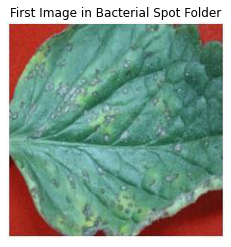

In [35]:
# Plot the first image in the bacterial_spot folder,
img=Image.open(str(bacterial_spot[0]))
plt.imshow(img)
plt.axis('off')  # Remove axes for better visualization
plt.title("First Image in Bacterial Spot Folder")
plt.show()

In [36]:
#size of image array
image_array = np.array(img)
h, w, c = image_array.shape
print('height: ', h)
print('width:  ', w)
print('channel:', c)

height:  227
width:   227
channel: 3
